In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience creacions,sector 22,3.20,11500.0,2783.0,Super Built up area 2781(258.36 sq.m.),3,4,3+,2.0,North-East,New Property,2781.0,NaN,NaN,0,0,0,0,0,1,42
1,flat,m3m woodshire,sector 107,1.80,7623.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet a...,3,4,3+,2.0,NaN,Relatively New,2361.0,NaN,1384.0,0,1,0,0,0,1,129
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up ar...,1,1,1,5.0,North,Moderately Old,465.0,450.0,425.0,0,0,0,0,0,0,39
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3,3,3,3.0,East,Undefined,NaN,NaN,958.0,0,0,1,1,0,1,131
4,flat,imt view society,manesar,0.95,3653.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,3,4,3,6.0,South-East,Moderately Old,2600.0,NaN,1900.0,0,1,0,0,0,1,81


In [5]:
df.shape

(3674, 23)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

## price

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

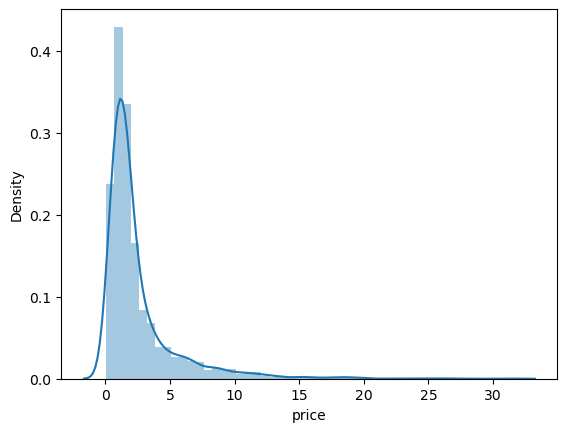

In [7]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='price'>

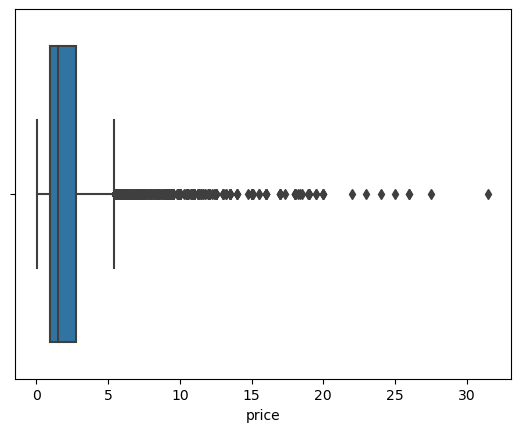

In [8]:
sns.boxplot(x=df['price'])

In [9]:
#calculate the IQR for the 'price' column
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1

#Define bounds for outliers 
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR


#Identify outliers
outliers=df[(df['price']<lower_bound)| (df['price']>upper_bound)]

#Displaying the number of outliers and some statistics
num_outliers=outliers.shape[0]
outliers_price_stats=outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

* There are around 425 outliers in the given dataset, as indicated by the box plot.

In [10]:
outliers.sort_values('price_per_sqft', ascending=False).tail(50)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1130,house,godrej meridien,sector 106,5.60,14000.0,4000.0,Plot area 4000(371.61 sq.m.),5,4,3+,33.0,North-East,New Property,NaN,4000.00,NaN,1,1,1,1,0,1,151
1967,house,tata primanti,sector 72,8.50,13492.0,6300.0,Plot area 6300(585.29 sq.m.),5,6,3+,10.0,East,Relatively New,NaN,6300.00,NaN,1,1,1,1,0,0,145
1999,house,independent,sector 23,5.50,13095.0,4200.0,Plot area 4200(390.19 sq.m.),9,9,3+,3.0,South,Moderately Old,NaN,4200.00,NaN,0,1,0,0,1,0,0
1942,house,international city by sobha phase 2,sector 109,7.00,12963.0,5400.0,Plot area 600(501.68 sq.m.),5,6,2,2.0,West,Relatively New,NaN,5400.00,NaN,0,1,0,0,0,1,154
2386,house,international city by sobha phase 2,sector 109,7.00,12963.0,5400.0,Plot area 600(501.68 sq.m.),4,4,3+,2.0,West,Relatively New,NaN,5400.00,NaN,0,0,0,0,0,0,102
3652,house,independent,sector 26,5.80,12837.0,4518.0,Plot area 502(419.74 sq.m.),4,4,3+,4.0,NaN,Old Property,NaN,4518.00,NaN,0,0,0,0,0,1,38
2594,house,international city by sobha phase 2,sector 109,6.80,12593.0,5400.0,Plot area 600(501.68 sq.m.),4,5,3,2.0,North-West,Relatively New,NaN,5400.00,NaN,0,1,0,0,0,1,49
1312,house,experion windchants,sector 112,7.99,12519.0,6382.0,Built Up area: 6382 (592.91 sq.m.),4,6,3,2.0,South-East,New Property,NaN,6382.00,NaN,0,1,1,1,0,0,129
639,flat,ambience lagoon,sector 24,5.80,12500.0,4640.0,Built Up area: 3700 (343.74 sq.m.),3,4,3+,9.0,North-East,Old Property,NaN,3700.00,NaN,1,1,0,1,1,2,68
1523,house,tata primanti,sector 72,8.60,12285.0,7000.0,Built Up area: 7000 (650.32 sq.m.),4,5,3+,3.0,NaN,Relatively New,NaN,7000.00,NaN,0,0,0,0,0,0,30


* on the basis of price column we can say that there are some genuine outliers but there are some data erros as well.

## price_per_sqft 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

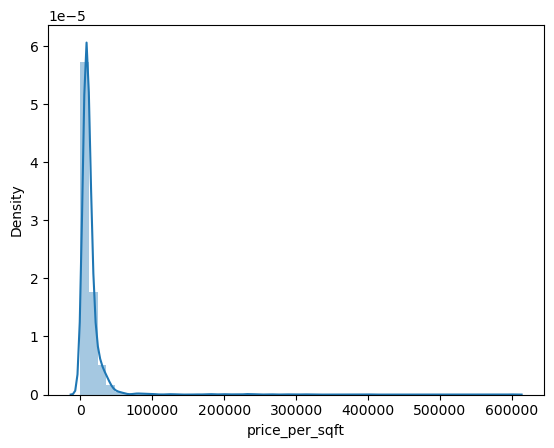

In [11]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

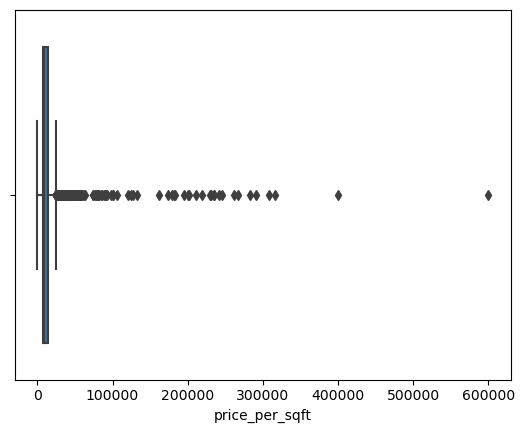

In [12]:
sns.boxplot(x=df['price_per_sqft'])

In [13]:
# Calculate the IQR for the 'price_per_sqft' column
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1

# Define bound for outliers
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft']< lower_bound) | (df['price_per_sqft']> upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers=outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [14]:
# Some values in the 'price_per_sqft' column are in square yards, so I decided to convert those values into square feet.
outliers_sqft['area']=outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\Damodhara\AppData\Local\Temp\ipykernel_11688\1026315212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area']=outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [15]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\Damodhara\AppData\Local\Temp\ipykernel_11688\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [16]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [17]:
# updating outliers in the original dataset 
df.update(outliers_sqft)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

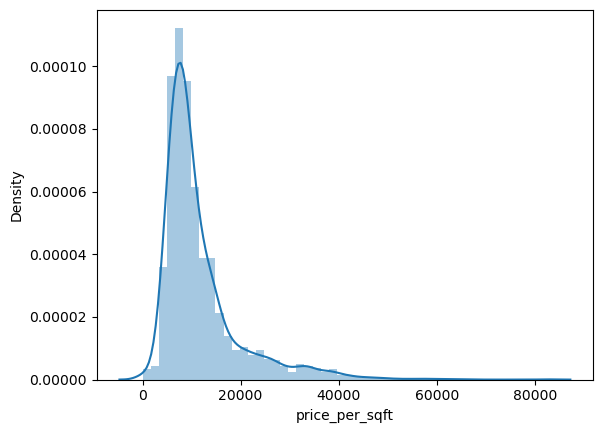

In [18]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

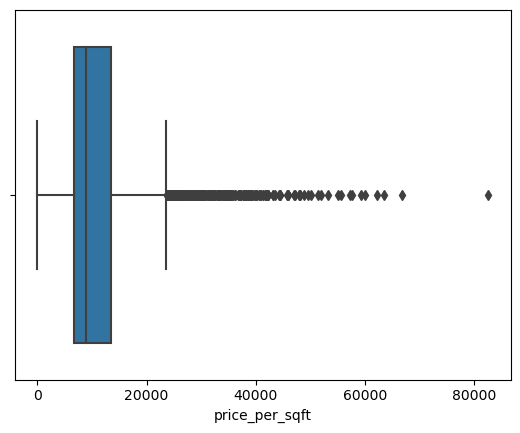

In [19]:
sns.boxplot(x=df['price_per_sqft'])

* We can see that there is some improvement in the distribution and box plot.

In [20]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
63,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,138.0
89,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,122.0
107,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,75.0
498,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,137.0
751,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,0.0,103.0
1385,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,160.0
1390,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1632,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,153.0
1774,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
2114,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,99.0


In [21]:
#removing values more than 500000 in price_per_sqft column
df=df[df['price_per_sqft']<=50000]

<AxesSubplot:xlabel='price_per_sqft'>

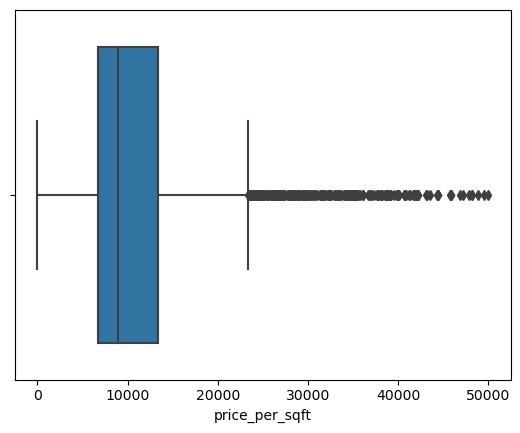

In [22]:
sns.boxplot(x=df['price_per_sqft'])

## area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

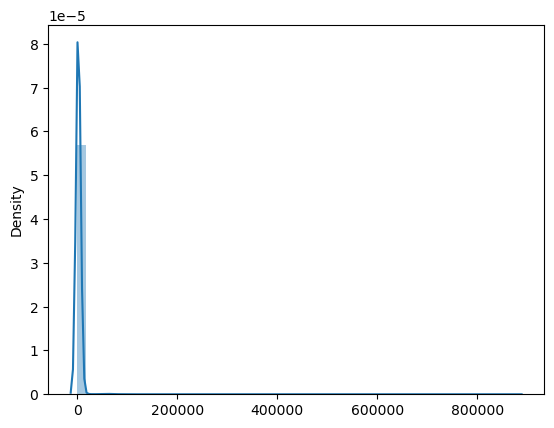

In [23]:
sns.distplot(x=df['area'])

<AxesSubplot:xlabel='area'>

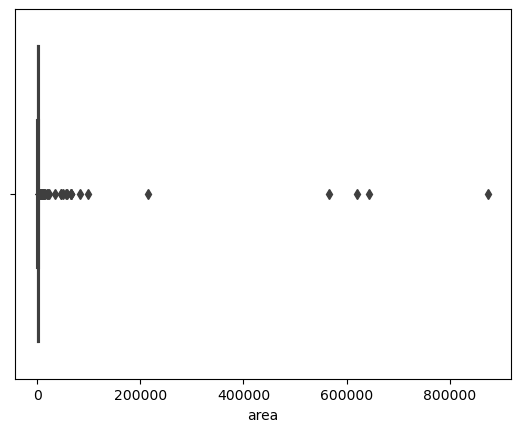

In [24]:
sns.boxplot(x=df['area'])

In [25]:
df['area'].describe()

count      3649.000000
mean       2947.356810
std       23201.844597
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [26]:
# filtering rows area is greater than 100000
df[df['area']>100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
734,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,44.0
1030,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,1.0,65.0
1343,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,1.0,76.0
2271,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2661,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0


In [27]:
#removing values greater than 100000
df=df[df['area']<100000]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

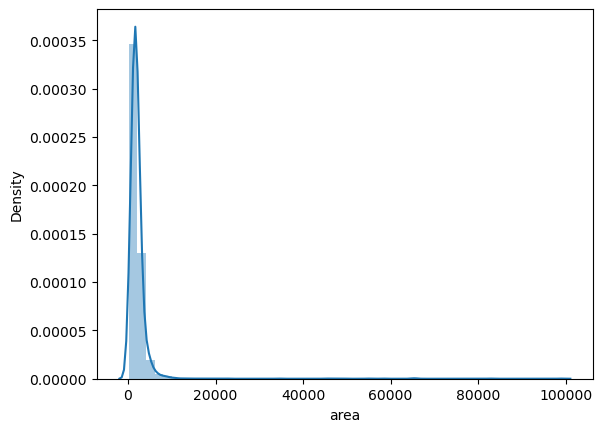

In [28]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

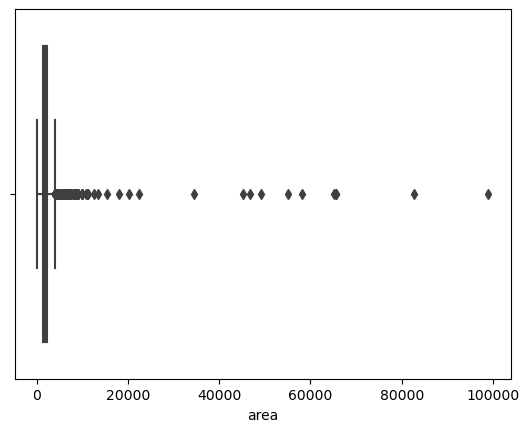

In [29]:
sns.boxplot(x=df['area'])

In [30]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
292,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2246,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
2959,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,1.0,15.0
1097,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,1.0,51.0
2559,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1124,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,1.0,15.0
688,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,1.0,37.0
2221,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,1.0,37.0
3285,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,0.0,109.0
2824,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,1.0,33.0


In [31]:
# I manually checked some rows with larger area but fewer bedrooms, so I decided to remove those rows.
df.drop(index=[2959,1124,688,2221,2824,2864],inplace=True)

In [32]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
292,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2246,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
1097,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,1.0,51.0
2559,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3285,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,0.0,109.0
3221,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0.0,1.0,0.0,0.0,0.0,0.0,61.0
3140,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1.0,1.0,0.0,1.0,1.0,0.0,123.0
807,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1.0,0.0,0.0,1.0,1.0,0.0,44.0
2016,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0.0,1.0,0.0,0.0,0.0,1.0,160.0
1374,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [33]:
#In the above table, I identified data errors in some of the rows and corrected them.
df.loc[292,'area']=11000
df.loc[2559,'area']=7250
df.loc[3285,'area']=5800
df.loc[3140,'area']=2850
df.loc[2016,'area']=2160
df.loc[3391,'area']=1175
df.loc[2967,'area']=3500

In [34]:
df=df[df['area']<12000]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

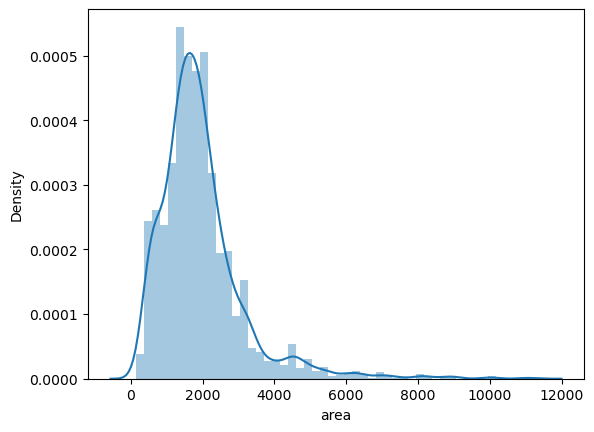

In [35]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

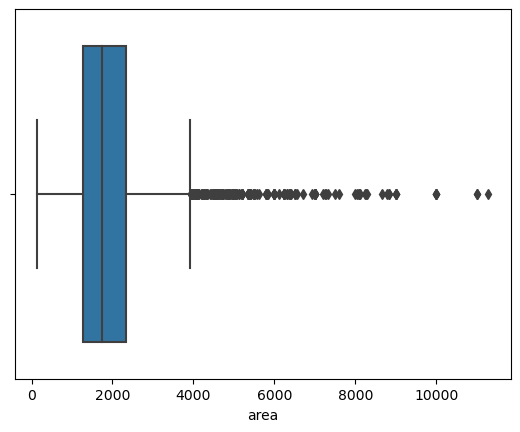

In [36]:
sns.boxplot(x=df['area'])

In [37]:
df['area'].describe()

count     3633.000000
mean      1951.114231
std       1216.409925
min        145.000000
25%       1261.000000
50%       1747.000000
75%       2329.000000
max      11286.000000
Name: area, dtype: float64

## bedroom

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

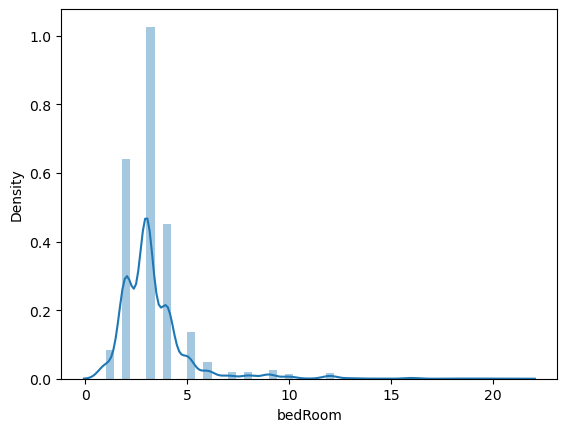

In [38]:
sns.distplot(df['bedRoom'])

<AxesSubplot:xlabel='bedRoom'>

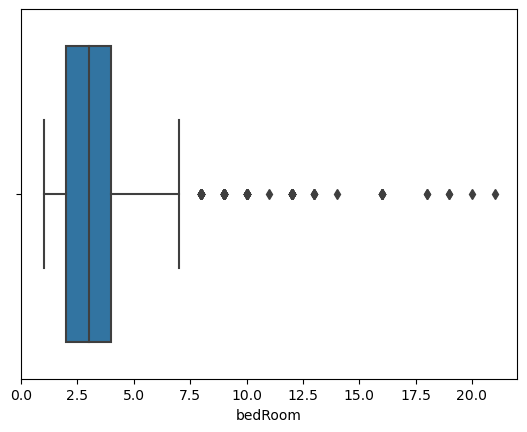

In [39]:
sns.boxplot(x=df['bedRoom'])

In [40]:
df['bedRoom'].describe()

count    3633.000000
mean        3.330581
std         1.824935
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [41]:
df[df['bedRoom']>10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
576,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,49.0
2847,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,22.0
2252,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,74.0
186,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,68.0
1407,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,57.0
1123,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,70.0
96,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,49.0
2870,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2150,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,31.0
127,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [43]:
#filtering bed rooms less than or equal to 10
df=df[df['bedRoom']<=10]

In [44]:
df.shape

(3588, 23)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

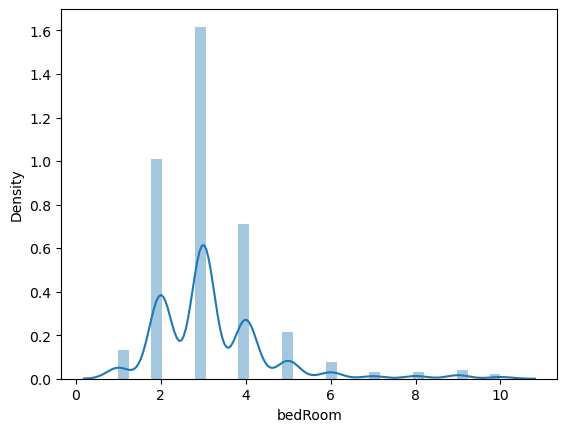

In [45]:
sns.distplot(df['bedRoom'])

<AxesSubplot:xlabel='bedRoom'>

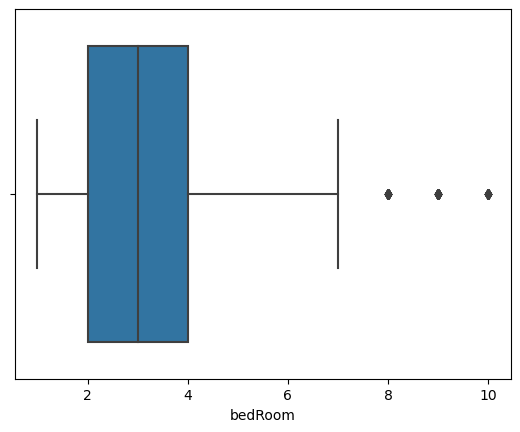

In [46]:
sns.boxplot(x=df['bedRoom'])

In [47]:
df['bedRoom'].describe()

count    3588.000000
mean        3.200669
std         1.386895
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

* Removing bedrooms from houses or flats numbering more than 20, there is an improvement in the boxplot and distribution.

## bathroom

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathroom', ylabel='Density'>

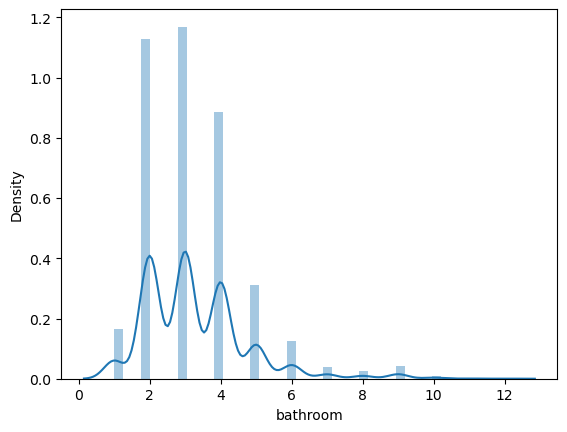

In [48]:
sns.distplot(df['bathroom'])

<AxesSubplot:xlabel='bathroom'>

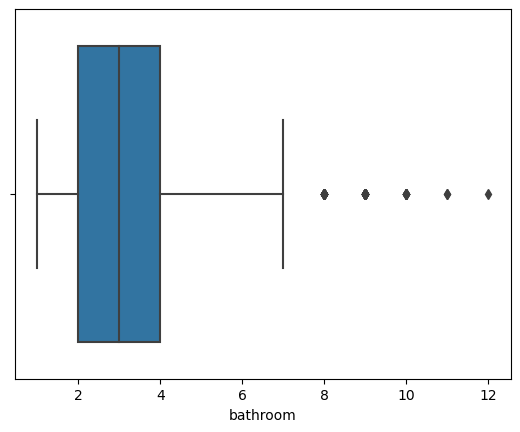

In [49]:
sns.boxplot(x=df['bathroom'])

In [50]:
df[df['bathroom']>10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
156,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,146.0
523,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,38.0
2251,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,39.0


In [51]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience creacions,sector 22,3.20,11500.0,2783.0,Super Built up area 2781(258.36 sq.m.),3.0,4.0,3+,2.0,North-East,New Property,2781.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,42.0
1,flat,m3m woodshire,sector 107,1.80,7623.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet a...,3.0,4.0,3+,2.0,NaN,Relatively New,2361.0,NaN,1384.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up ar...,1.0,1.0,1,5.0,North,Moderately Old,465.0,450.0,425.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,3.0,East,Undefined,NaN,NaN,958.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0
4,flat,imt view society,manesar,0.95,3653.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,3.0,4.0,3,6.0,South-East,Moderately Old,2600.0,NaN,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0


## super_builtup_area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='super_built_up_area', ylabel='Density'>

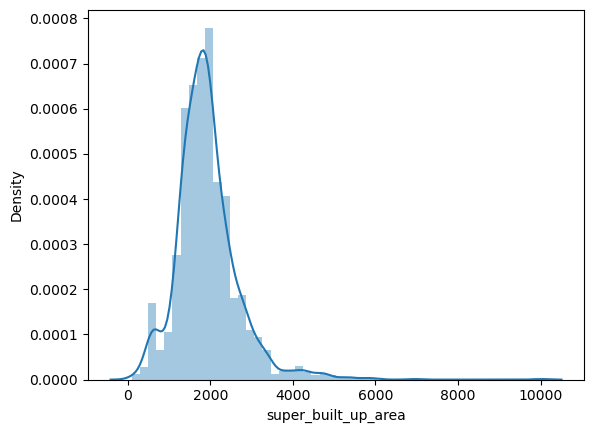

In [52]:
sns.distplot(df['super_built_up_area'])

<AxesSubplot:xlabel='super_built_up_area'>

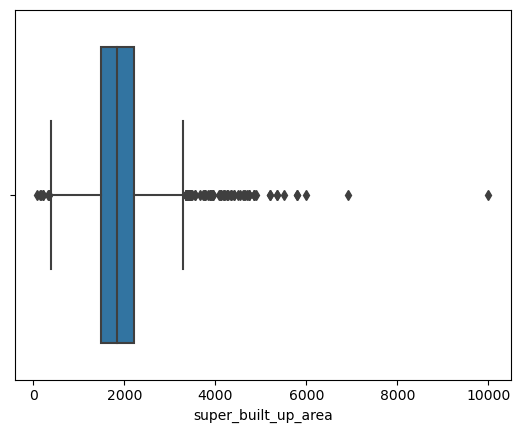

In [53]:
sns.boxplot(x=df['super_built_up_area'])

In [54]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.988033
std        764.044855
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [55]:
df[df['super_built_up_area']>6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1342,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,140.0
3591,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='built_up_area', ylabel='Density'>

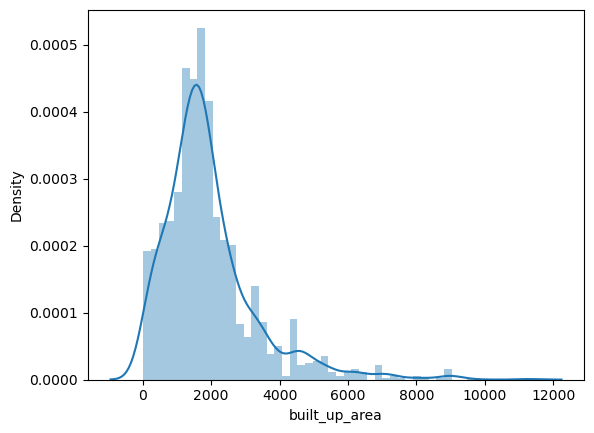

In [56]:
#built_up_area
sns.distplot(df['built_up_area'])

<AxesSubplot:xlabel='built_up_area'>

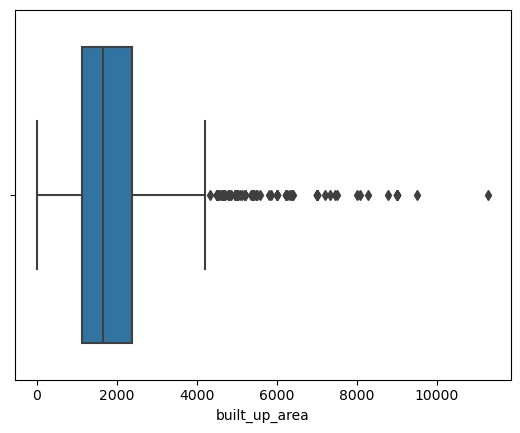

In [57]:
sns.boxplot(x=df['built_up_area'])

In [58]:
df[df['built_up_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1885,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,42.0


## carpet area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carpet_area', ylabel='Density'>

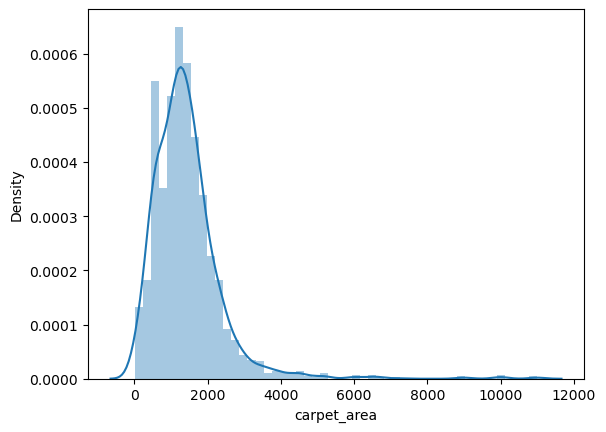

In [59]:
sns.distplot(df['carpet_area'])

<AxesSubplot:xlabel='carpet_area'>

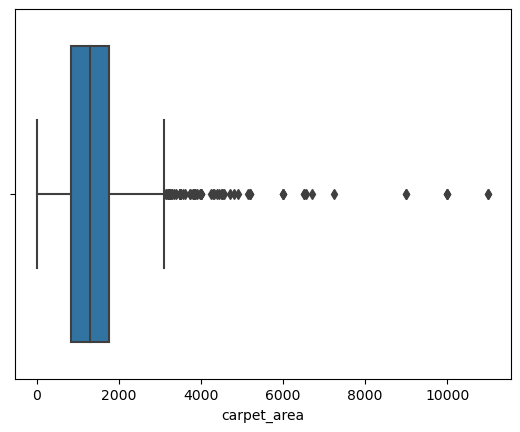

In [60]:
sns.boxplot(x=df['carpet_area'])

In [61]:
df[df['carpet_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
292,house,independent,sector 26,18.4,1859.0,11000.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2852,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0


In [62]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience creacions,sector 22,3.20,11500.0,2783.0,Super Built up area 2781(258.36 sq.m.),3.0,4.0,3+,2.0,North-East,New Property,2781.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,42.0
1,flat,m3m woodshire,sector 107,1.80,7623.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet a...,3.0,4.0,3+,2.0,NaN,Relatively New,2361.0,NaN,1384.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up ar...,1.0,1.0,1,5.0,North,Moderately Old,465.0,450.0,425.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,3.0,East,Undefined,NaN,NaN,958.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0
4,flat,imt view society,manesar,0.95,3653.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,3.0,4.0,3,6.0,South-East,Moderately Old,2600.0,NaN,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='luxury_score', ylabel='Density'>

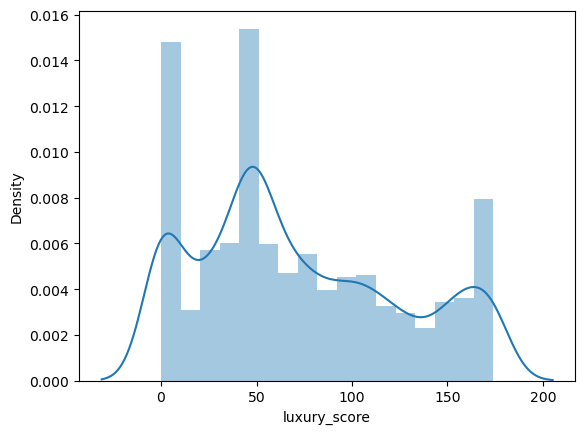

In [63]:
sns.distplot(df['luxury_score'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

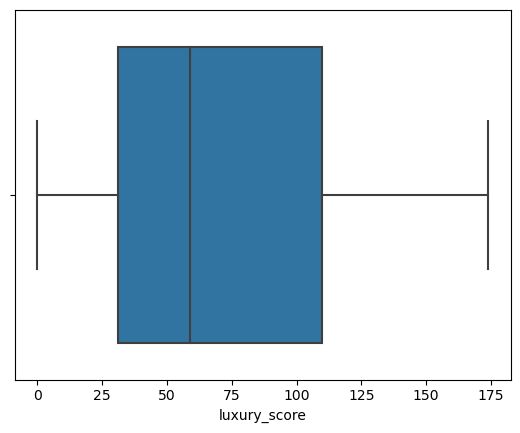

In [64]:
sns.boxplot(df['luxury_score'])

In [65]:
df.shape

(3588, 23)

In [66]:
df['price_per_sqft']=round((df['price']*10000000)/df['area'])

In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience creacions,sector 22,3.20,11498.0,2783.0,Super Built up area 2781(258.36 sq.m.),3.0,4.0,3+,2.0,North-East,New Property,2781.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,42.0
1,flat,m3m woodshire,sector 107,1.80,7624.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet a...,3.0,4.0,3+,2.0,NaN,Relatively New,2361.0,NaN,1384.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up ar...,1.0,1.0,1,5.0,North,Moderately Old,465.0,450.0,425.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,3.0,East,Undefined,NaN,NaN,958.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0
4,flat,imt view society,manesar,0.95,3652.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,3.0,4.0,3,6.0,South-East,Moderately Old,2600.0,NaN,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

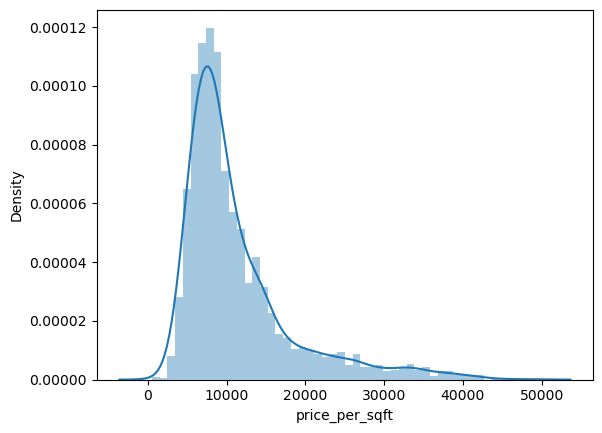

In [68]:
sns.distplot(df['price_per_sqft'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

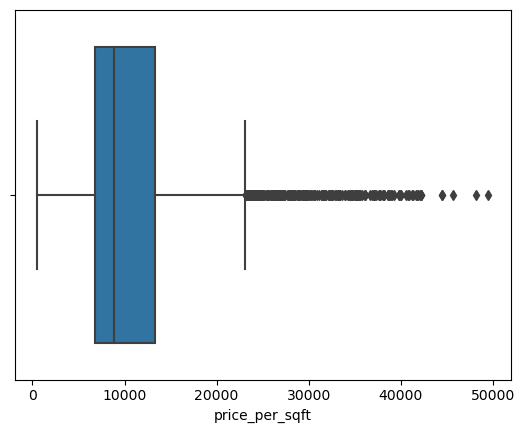

In [69]:
sns.boxplot(df['price_per_sqft'])

In [70]:
df[df['price_per_sqft']>42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
414,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0
642,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,121.0
1066,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0
1741,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
1965,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2044,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2520,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,103.0
3075,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,7.0
3215,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,0.0,88.0


In [71]:
x=df[df['price_per_sqft']<=20000]
(x['area']/x['bedRoom']).quantile(0.05)

252.5

In [72]:
df[df['area']/df['bedRoom']<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2735,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2861,flat,signature global solera,sector 107,0.28,5833.0,480.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,0.0,North-East,Relatively New,NaN,NaN,489.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0
3737,house,huda floor,sector 38,4.00,22222.0,1800.0,Plot area 1800(167.23 sq.m.)Built Up area: 480...,9.0,9.0,3+,2.0,East,Relatively New,NaN,4800.0,3800.0,0.0,0.0,1.0,1.0,0.0,0.0,152.0
1397,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1667,flat,prime habitat,sector 99a,0.27,5433.0,497.0,Carpet area: 497 (46.17 sq.m.),2.0,2.0,1,4.0,North-East,New Property,NaN,NaN,497.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0


* In the table above, the values are erroneous due to the smaller area and a higher number of bedrooms.

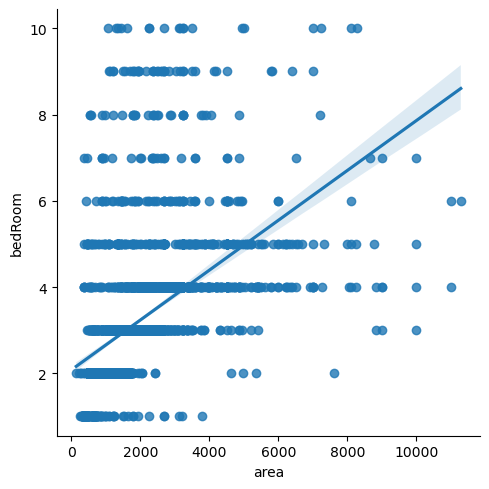

In [73]:
sns.lmplot(data=df, x='area',y='bedRoom')

* In the graph above, rows with an area of less than 2000 sqft and a higher number of bedrooms may contain errors.

In [74]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [75]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

2.0     47
3.0     33
5.0     28
6.0     17
4.0     17
9.0     15
8.0     12
7.0      8
10.0     7
Name: bedRoom, dtype: int64

In [77]:
# Remove rows where the 'area_room_ratio' is less than 100.
df=df[df['area_room_ratio']>100]

In [78]:
outliers_df=df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [79]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\Damodhara\AppData\Local\Temp\ipykernel_11688\3359844150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [80]:
df.update(outliers_df)

In [81]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [82]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
288,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,225.000000
668,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,113.000000
810,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,180.000000
857,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
1121,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,29.0,120.600000
1295,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
1397,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,220.000000
1500,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,222.750000
1816,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.666667
2486,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0,225.000000


In [83]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)].shape

(13, 24)

In [84]:
df=df[~((df['area_room_ratio']<250)&(df['bedRoom']>4))]

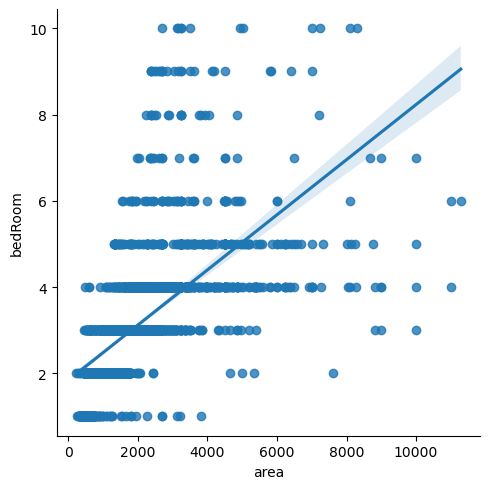

In [85]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [86]:
df.shape

(3555, 24)

In [87]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ambience creacions,sector 22,3.20,11498.0,2783.0,Super Built up area 2781(258.36 sq.m.),3.0,4.0,3+,2.0,North-East,New Property,2781.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,42.0,927.666667
1,flat,m3m woodshire,sector 107,1.80,7624.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet a...,3.0,4.0,3+,2.0,NaN,Relatively New,2361.0,NaN,1384.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0,787.000000
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up ar...,1.0,1.0,1,5.0,North,Moderately Old,465.0,450.0,425.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,465.000000
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,3.0,East,Undefined,NaN,NaN,958.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0,319.333333
4,flat,imt view society,manesar,0.95,3652.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,3.0,4.0,3,6.0,South-East,Moderately Old,2600.0,NaN,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0,867.000000


In [88]:
df.to_csv('gurgaon_properties_outliers_treated.csv',index=False)